# problem statement: 
Keywords::FDS  system  
        
        
        K-nearest neighbor
        OneR 
        AdaBoost
        Naïve Bayes  
        Random forest  
        SVM  
        Decision tree  
       
       
       from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

# import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
sns.set(palette="Set2")

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, average_precision_score,f1_score,confusion_matrix,precision_score, recall_score,classification_report, roc_curve,auc 



# data loading

In [2]:
df = pd.read_csv("onlinefraud.csv")

In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4866698,348,CASH_OUT,30987.06,C1386868000,30133.0,0.00,C806219765,195411.84,226398.90,0,0
6350276,695,PAYMENT,2122.72,C971771590,5013.0,2890.28,M591109092,0.00,0.00,0,0
4239922,306,CASH_OUT,102382.50,C127503680,31959.0,0.00,C1997350826,756453.93,858836.43,0,0
1254191,134,TRANSFER,547634.16,C559950126,40067.0,0.00,C2033729221,24328.04,571962.20,0,0
3807880,281,CASH_OUT,196190.58,C606296344,0.0,0.00,C235595766,3336611.79,3532802.37,0,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

**step**: 
The unit of time in the simulation.
**type**: 
The type of transaction (e.g., transfer, payment).
**amount**: 
The monetary amount of the transaction.
**nameOrig**: 
Identifier of the originating account.
**oldbalanceOrg**: 
Balance in the originating account before the transaction.
**newbalanceOrig**: 
Balance in the originating account after the transaction.
**nameDest**: 
Identifier of the destination account.
**oldbalanceDest**: 
Balance in the destination account before the transaction.
**newbalanceDest**: 
Balance in the destination account after the transaction.
**isFraud**: 
Binary indicator (1 if fraudulent, 0 otherwise).
**isFlaggedFraud**: 
Binary indicator (1 if the transaction is flagged as fraudulent according to business rules, 0 otherwise).

In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Checking count of Fraud and Non-Fraud Transactions

In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

# summary statistics 

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# unique values

In [10]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

# missing values

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# data types

In [11]:
df.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# Consistency Checks

In [12]:
# (checking for valid values in a categorical column)
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# duplicated values

In [13]:
df.duplicated().sum()

0

# Checking correlation

In [14]:
df.corr()

C:\Users\IMRAN ROSHAN\AppData\Local\Temp\ipykernel_7948\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


# Visualizations


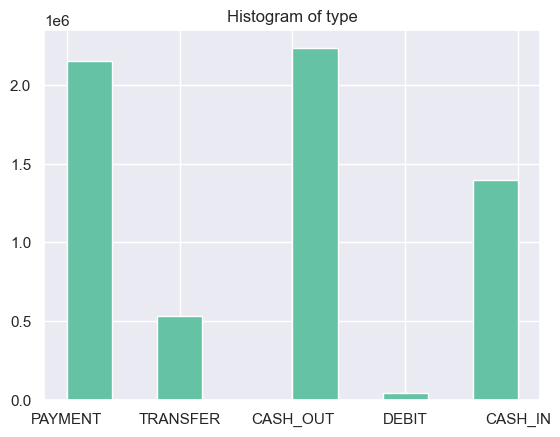

In [15]:
df['type'].hist()
plt.title('Histogram of type')
plt.show()

# Proportion of type of Transactions

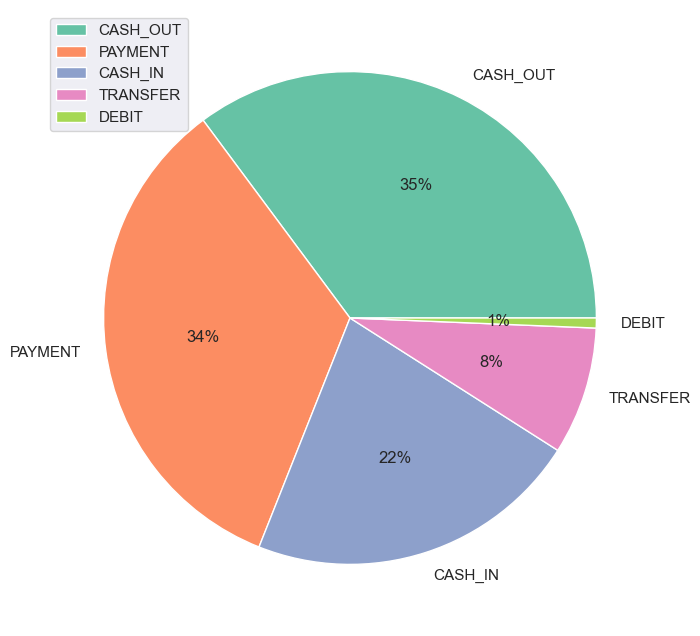

In [16]:
type1 = df['type'].value_counts()
transaction = type1.index
count = type1.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

# Count of Fraud and Non-Fraud Transactions in each type of Transaction

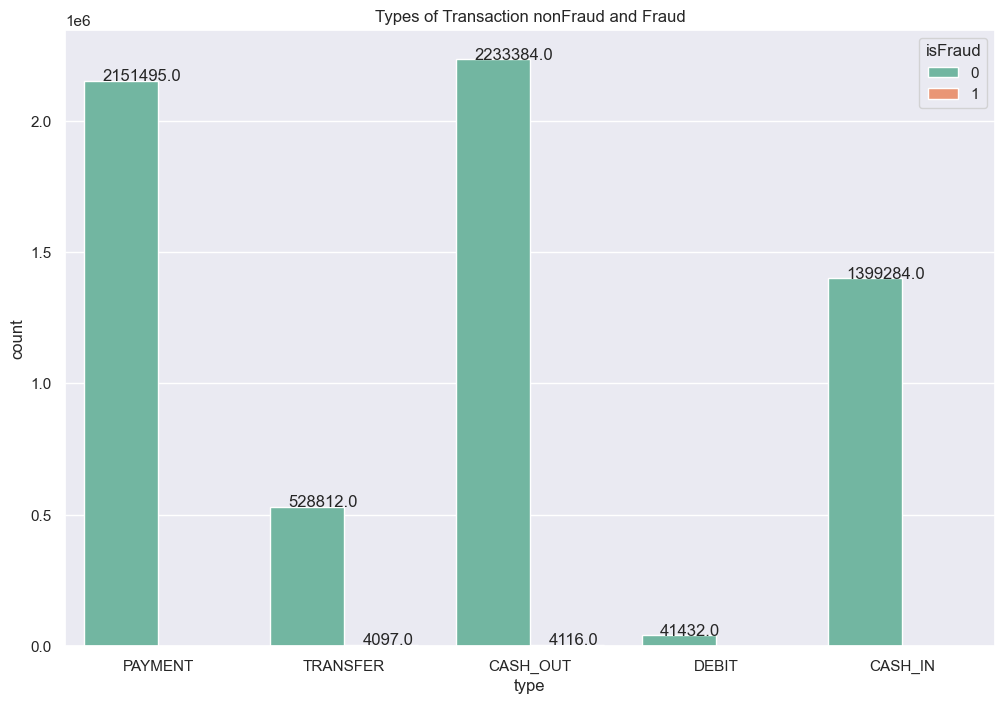

In [17]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = df)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

**Fraudulent Transactions:**
   Only 'TRANSFER' and 'CASH_OUT' transactions involve fraud.

**Transaction Frequency:**
   'DEBIT' transactions are rare.
   'TRANSFER' transactions are less common than other types.

**Fraud Patterns:**
   Similar numbers of fraud in 'TRANSFER' and 'CASH_OUT.'
   Suggests a possible fraud method: transferring funds and then cashing out.

**Next Steps:**
   Further investigation to confirm and explore this pattern.

In [18]:
data1 = df[(df['isFraud']==1) & (df['type']=='TRANSFER')]
data1['nameDest'].value_counts()

C553264065     1
C988859148     1
C1287650869    1
C922180689     1
C131895413     1
              ..
C776246900     1
C1234144009    1
C571016162     1
C1381364691    1
C2080388513    1
Name: nameDest, Length: 4097, dtype: int64

In [19]:
data2=df[(df['isFraud']==1) & (df['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()


C840083671     1
C1055498407    1
C1886113938    1
C520336445     1
C463684846     1
              ..
C1641368956    1
C2120940829    1
C992121519     1
C1663597987    1
C1280323807    1
Name: nameOrig, Length: 4116, dtype: int64

There are no specific accounts from which fraud transactions are carried out .

Hence we disregard our suspicioun. So these account name features are not useful for us in modelling as is.

# Let's check further

In [20]:
Fraud = df[df["isFraud"] == 1]
notFraud = df[df["isFraud"] == 0]

fraud_transfer = Fraud[Fraud["type"] == "TRANSFER"]
fraud_cashout = Fraud[Fraud["type"] == "CASH_OUT"]

# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

For fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.

We derive a new feature Transaction Type2 from these features account types "C" (customer) and "M" (merchant), which would be the first character for each value under nameOrig and nameDest.

We will create a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

# adding feature type1

In [3]:
data_new = df.copy() # creating copy of dataset in case I need original dataset
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'),"Type2"] = "MM"

# Plotting Pairplot¶
# Visualizing Numeric variables against Fraud using Boxplots

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

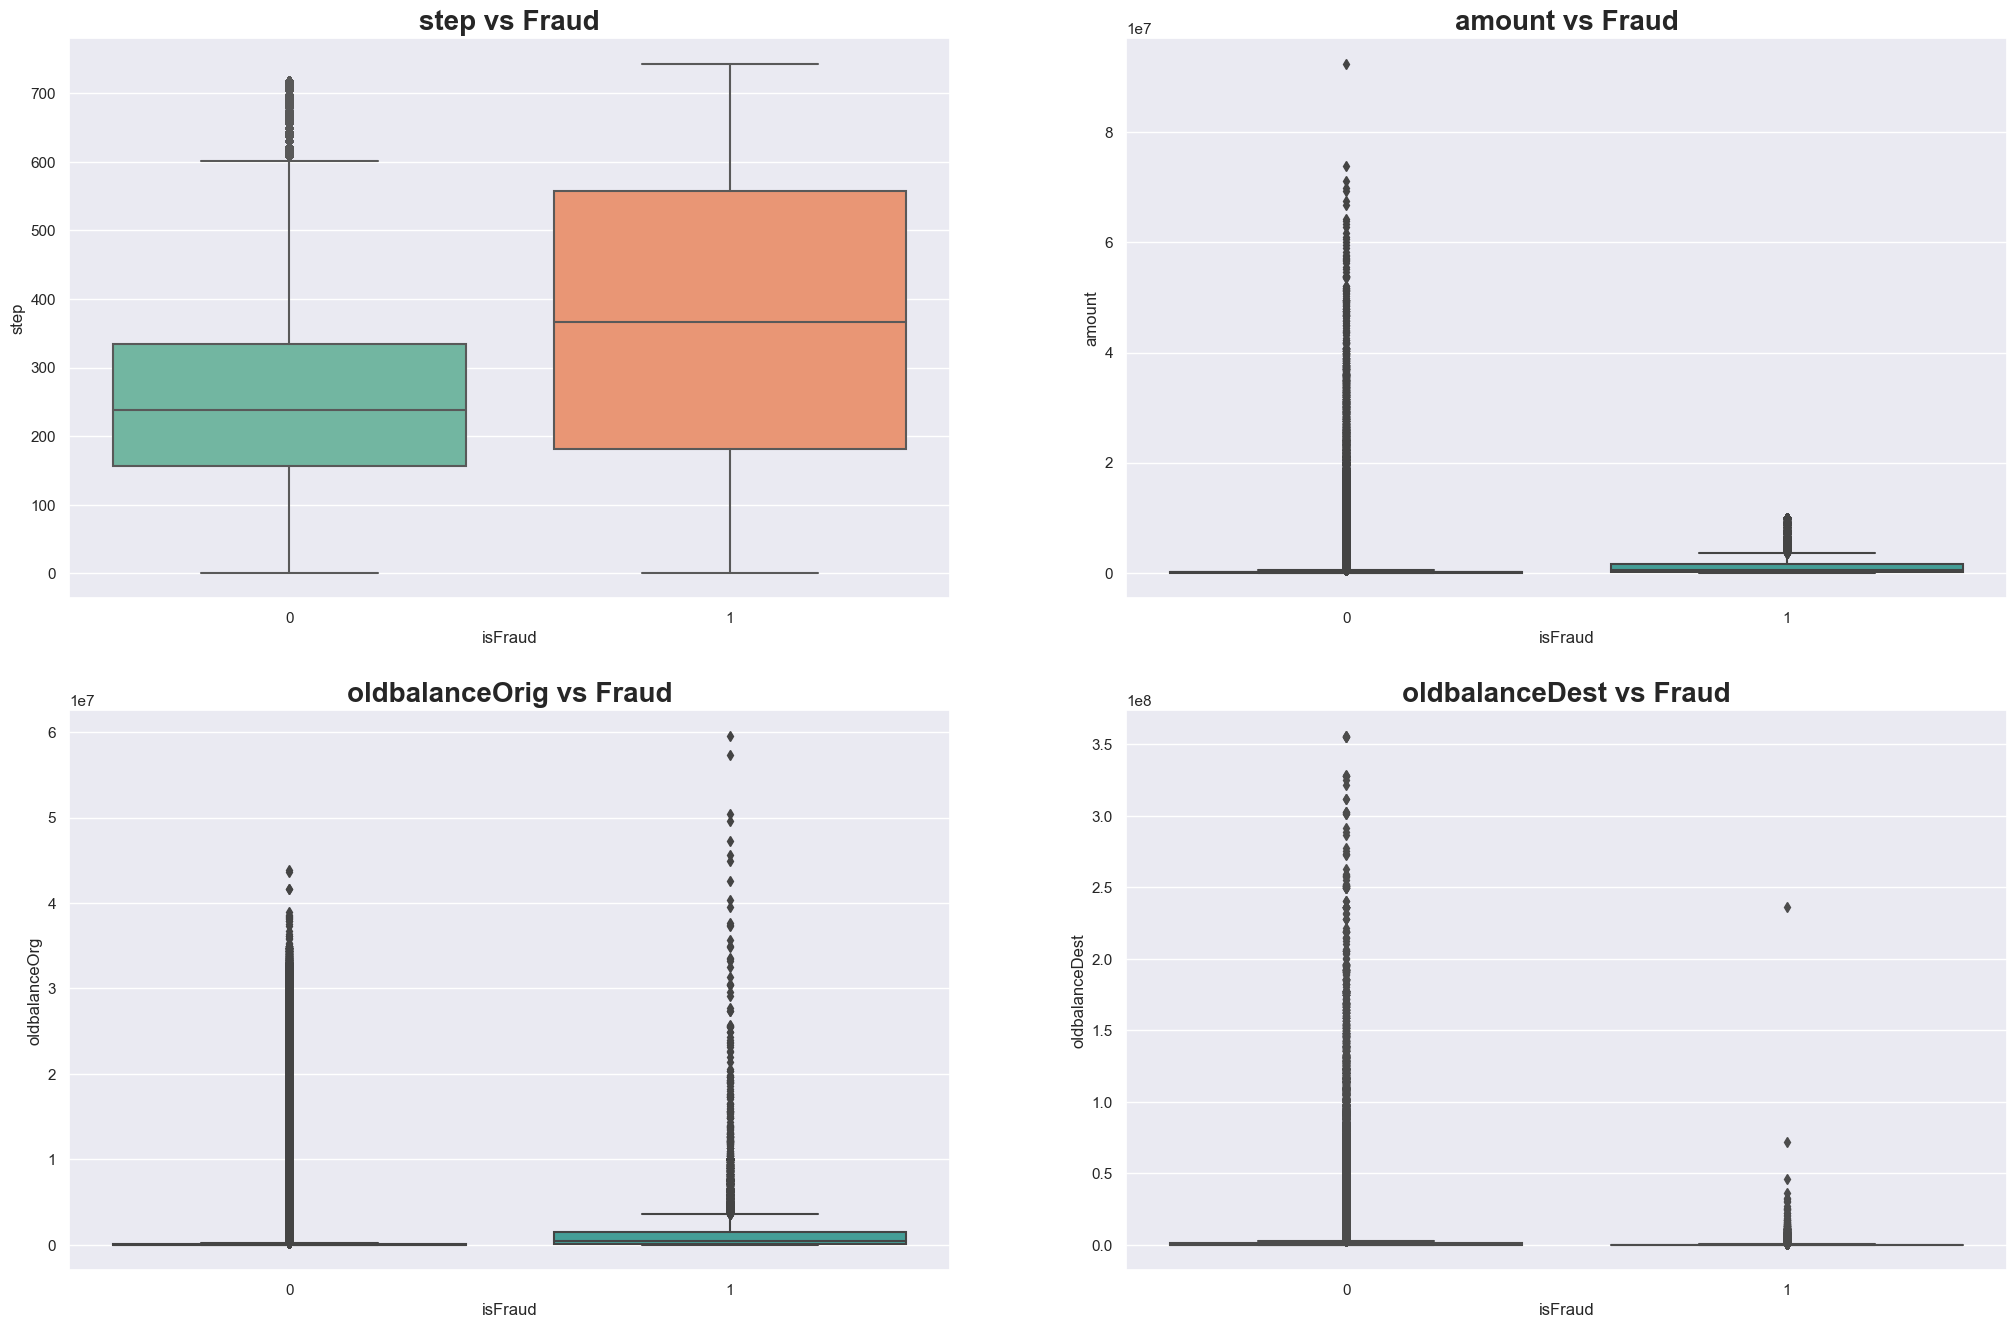

In [22]:
plt.figure(figsize=(25, 16))

plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)


plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)


plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)


plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

Median amount for fraud transactions is greater than Non Fraud transactions. Balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.

In [4]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 CC    8213
Name: Type2, dtype: int64

 Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: Type2, dtype: int64


**From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer)**

# Looking balances before and after the transaction

In [5]:
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])


print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


**Most, if not all, of the observations have errors in calculating the balances before and after the transaction.**

**Since We don't know why these errors are caused, We cannot treat them.**

**We will not process them and use them as is for our modelling purpose.**

# Looking at Time

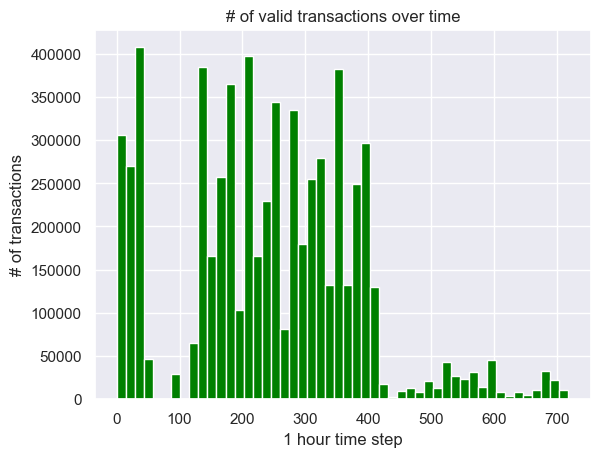

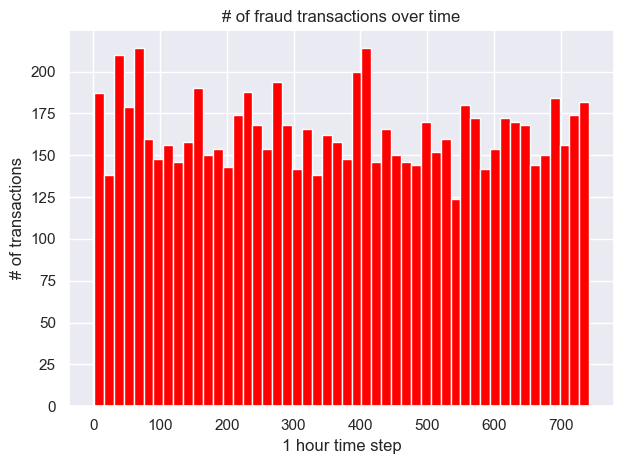

In [6]:
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()


A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th time-steps. The frequency at which fraudulent transactions occur does not seem to change much over time.

Let's see what the patterns look like over any particular, day of the week or hour of the day.

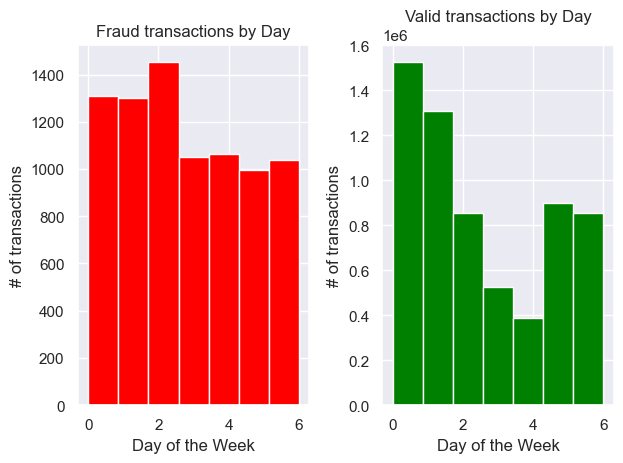

In [7]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

From the graphs above, there is little evidence to suggest that fraudulent transactions occur at particular days of the week.

While valid transactions occur less on some two consecutive days of the week.

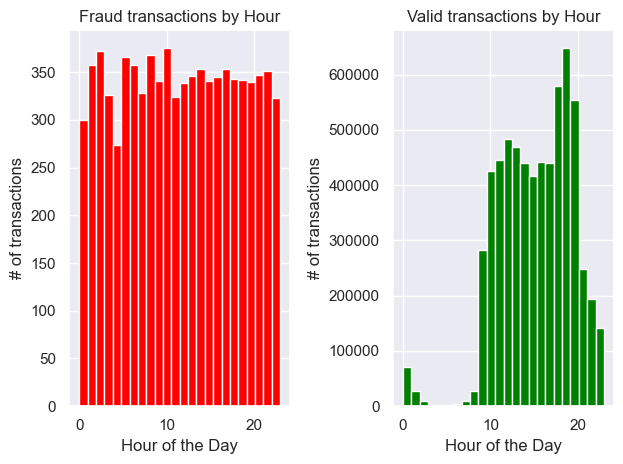

In [27]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

We observe that from hour 0 to hour 9 valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 .

In response to this, We1m will create another feature HourOfDay, which is the step column with each number taken to modulo 24.

In [8]:
data_new["HourOfDay"] = np.nan # initializing feature column
data_new.HourOfDay = data_new.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(data_new))

Head of dataset1: 
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud Type2  \
0  M1979787155             0.0             0.0        0               0    CM   
1  M2044282225             0.0             0.0        0               0    CM   
2   C553264065             0.0             0.0        1               0    CC   
3    C38997010         21182.0             0.0        1               0    CC   
4  M1230701703             0.0             0.0        0               0    CM   

   HourOfDay  
0          1  
1          1

# drop columns irrelevant for our modelling

In [9]:
data_new = data_new.drop(labels=["isFlaggedFraud",'nameOrig','nameDest'],axis=1)

Omitting 'nameOrig' and 'nameDest' due to their nature as identifiers and 'isFlaggedFraud' as it's often a result of post-processing and may introduce redundancy in fraud prediction models.

# Pairplot of Variables
## Handling Categorical Variables

In [10]:
data_new = pd.get_dummies(data_new,prefix=['type','Type2'],drop_first=True)

In [11]:
data_new.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'HourOfDay', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER', 'Type2_CM'],
      dtype='object')

# Train-Test Split Standardizing Data

In [12]:
from sklearn.model_selection import train_test_split

X = data_new.drop(labels="isFraud",axis = 1)
y = data_new.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Model Selection

Non-parametric machine learning methods may be preferred due to the large size of the data and that the goal is accurate classification, not interpretation

# Performing Undersampling of Train Data

We undersample training data as when we trained classifiers with entire training data all classifiers except RandomForest and Neural Networks classified all points as non-Fraud and failed to detect any Fraud transaction

Our training data is in millions so models will still learn train data well as the undersampled data will still contain enough number of transactions

In [13]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.2)

# Fit and transform the training data
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

This aims to counteract class imbalance in training data, a common issue in machine learning. Balancing classes helps the model better learn patterns in the minority class, potentially improving overall performance, especially for the minority class, in binary classification tasks.

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred)

print("******************************************************************************")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_predtrain))

print("******************************************************************************")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\n")
print("Classification Report Train:\n", classification_report(y_train,y_predtrain))



Accuracy: 0.975451622130506
Precision: 0.03131110490362884
Area under precision (AUC) Recall: 0.01864977503917777
Recall: 0.5775175644028103
F1: 0.05940164763694175
******************************************************************************
Confusion Matrix:
 [[1550374   38146]
 [    902    1233]]


Confusion Matrix Train:
 [[4652008  113879]
 [   2598    3480]]
******************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1588520
           1       0.03      0.58      0.06      2135

    accuracy                           0.98   1590655
   macro avg       0.52      0.78      0.52   1590655
weighted avg       1.00      0.98      0.99   1590655



Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   4765887
           1       0.03      0.57      0.06      6078

    ac

#  K-nearest neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Naïve Bayes

# Random forest  Classifier

A random forest is an algorithm that generates several decisions trees and pools the results of each tree to make a more robust prediction.

Another great thing about Random Forest is that We can assign weights to each class to reduced the bias of the model towards the majority class.

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)
RF.fit(X_resampled, y_resampled)
y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

print("******************************************************************************")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_predtrain))

print("******************************************************************************")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\n")
print("Classification Report Train:\n", classification_report(y_train,y_predtrain))

C:\Users\IMRAN ROSHAN\Anaconda for Imran\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Accuracy: 0.9963266704596534
Precision: 0.2630368098159509
Area under precision (AUC) Recall: 0.2535986440785851
Recall: 0.9639344262295082
F1: 0.4132945074806707
******************************************************************************
Confusion Matrix:
 [[1582754    5766]
 [     77    2058]]


Confusion Matrix Train:
 [[4748870   17017]
 [      8    6070]]
******************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588520
           1       0.26      0.96      0.41      2135

    accuracy                           1.00   1590655
   macro avg       0.63      0.98      0.71   1590655
weighted avg       1.00      1.00      1.00   1590655



Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765887
           1       0.26      1.00      0.42      6078

    accu

When using entire training data for training RandomForest model the model classifies only a very small fraction as Fraud but misclassifies more than 20% Fraud transactions as non-Fraud which is not desirable. Hence we train our RandomForest Classifier to minimize misclassification of Fraud transactions allowing misclassification of non-Fraud transactions to some extent

# SVM  

In [ ]:
from sklearn import svm

In [ ]:
clf_svm = svm.SVC(kernel='rbf', C=1.0, gamma='scale') 


clf_svm.fit(X_resampled, y_resampled)
y_pred = clf_svm.predict(X_test)
y_predtrain = clf_svm.predict(X_train)



In [39]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

print("******************************************************************************")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_predtrain))

print("******************************************************************************")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\n")
print("Classification Report Train:\n", classification_report(y_train,y_predtrain))

Accuracy: 0.9963266704596534
Precision: 0.2630368098159509
Area under precision (AUC) Recall: 0.2535986440785851
Recall: 0.9639344262295082
F1: 0.4132945074806707
******************************************************************************
Confusion Matrix:
 [[1582754    5766]
 [     77    2058]]


Confusion Matrix Train:
 [[4748870   17017]
 [      8    6070]]
******************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588520
           1       0.26      0.96      0.41      2135

    accuracy                           1.00   1590655
   macro avg       0.63      0.98      0.71   1590655
weighted avg       1.00      1.00      1.00   1590655





KeyboardInterrupt: 